In [21]:
from __future__ure__ import print_function

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set(style='ticks', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline

import flotilla

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'

study = flotilla.embark('singlecell_pnm_figure2_modalities_bayesian', flotilla_dir=flotilla_dir)

not_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)


2016-06-09 18:12:40	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure2_modalities_bayesian/datapackage.json
2016-06-09 18:12:40	Parsing datapackage to create a Study object
2016-06-09 18:13:36 	Initializing Study
2016-06-09 18:13:36 	Initializing Predictor configuration manager for Study
2016-06-09 18:13:36	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-06-09 18:13:36	Added ExtraTreesClassifier to default predictors
2016-06-09 18:13:36	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-06-09 18:13:36	Added ExtraTreesRegressor to default predictors
2016-06-09 18:13:36	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-06-09 18:13:36	Added GradientBoostingClassifier to default predictors
2016-06-09 18:13:36	Predictor GradientBoostingRegressor is of type <class 'sklear

/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/__init__.py:65: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


In [2]:
transporter_library = pd.read_table('~/Transporter_library.genelist.aminoacidtransport.txt', index_col=0)
transporter_library.head()

,GRM2,GO:0006865_amino acid transport
ENSG00000164082,,
ENSG00000110436,SLC1A2,SLC|GO:0055085_transmembrane transport|GO:0006...
ENSG00000277361,OCA2,GO:0055085_transmembrane transport|GO:0006865_...
ENSG00000155465,SLC7A7,SLC|GO:0055085_transmembrane transport|GO:0006...
ENSG00000196712,NF1,GO:0006865_amino acid transport
ENSG00000080815,PSEN1,GO:0055085_transmembrane transport|GO:0016192_...


In [11]:
transporter_library.shape

(128, 2)

In [9]:
mkdir figures

AttributeError: 'DecompositionViz' object has no attribute 'savefig'

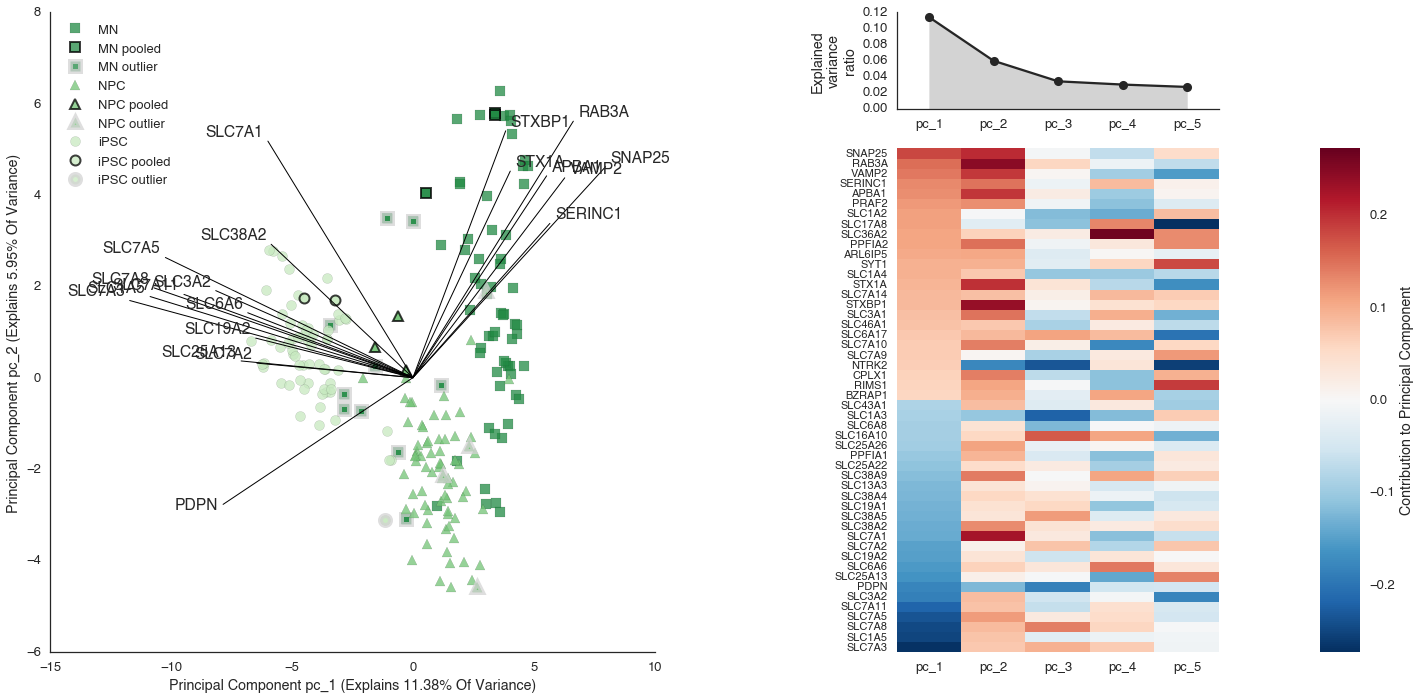

In [10]:
viz = study.plot_pca(feature_subset=transporter_library.index)
viz.savefig('figures/transporter_pca_expression.pdf')

In [18]:
transporters = study.expression.data.columns.intersection(transporter_library.index)

In [19]:
singles_expression = study.expression.singles.loc[not_outliers]
singles_expression = singles_expression[transporters]
singles_expression.head()

,ENSG00000110436,ENSG00000155465,ENSG00000196712,ENSG00000080815,ENSG00000134294,ENSG00000105649,ENSG00000158296,ENSG00000135423,ENSG00000115419,ENSG00000021488,...,ENSG00000180773,ENSG00000123159,ENSG00000146232,ENSG00000139974,ENSG00000177380,ENSG00000133107,ENSG00000040487,ENSG00000139209,ENSG00000138079,ENSG00000132639
CVN_01,4.366229,0,6.926635,0.890102,7.766210,0,0.430057,0.000000,6.645955,0.398335,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.831717,0,1.112018,0.000000
CVN_02,4.308565,0,6.416180,3.109400,6.265771,0,0.000000,0.000000,4.732071,0.000000,...,0.000000,0.000000,6.115526,0.257794,0.000000,0.000000,2.478565,0,4.065195,0.000000
CVN_03,0.273953,0,1.977359,1.374925,5.957181,0,0.212846,3.240899,6.617354,0.000000,...,1.410520,6.577057,0.000000,5.394672,4.516852,0.000000,0.000000,0,0.000000,0.000000
CVN_04,2.231746,0,4.223163,7.371162,5.895819,0,0.000000,0.000000,2.655274,0.000000,...,4.757071,0.132176,0.000000,5.393530,0.000000,3.661343,0.887103,0,5.429368,0.000000
CVN_05,0.379621,0,4.196526,2.183720,6.436353,0,0.000000,6.533727,7.156705,0.182471,...,0.317759,0.707571,5.781100,0.210697,0.000000,0.000000,0.453411,0,0.388052,5.742424


In [24]:
transporter_events = study.splicing.expression_to_splicing_id(transporter_library.index)
transporter_events = study.splicing.data.columns.intersection(transporter_events)

In [28]:
singles_splicing = study.splicing.singles.loc[not_outliers]
singles_splicing = singles_splicing[transporter_events]
print(singles_splicing.shape)
singles_splicing.head()

(181, 108)


,exon:chr11:62623518-62623853:+@exon:chr11:62638217-62638309:+@exon:chr11:62639049-62639141:+,exon:chr11:62623583-62623853:+@exon:chr11:62639049-62639141:+@exon:chr11:62648491-62648919:+,exon:chr11:62639049-62639141:+@exon:chr11:62644256-62644351:+@exon:chr11:62648491-62648919:+,exon:chr11:62639049-62639141:+@exon:chr11:62644259-62644351:+@exon:chr11:62648491-62648919:+,exon:chr11:62649171-62649538:+@exon:chr11:62649977-62650090:+@exon:chr11:62650380-62650471:+,exon:chr11:62650433-62650471:+@exon:chr11:62651461-62651584:+@exon:chr11:62651929-62651997:+,exon:chr11:70194295-70194526:+@exon:chr11:70196029-70196145:+@exon:chr11:70200407-70200558:+,exon:chr11:70194295-70194526:+@exon:chr11:70197100-70197129:+@exon:chr11:70200407-70200558:+,exon:chr11:70194295-70194526:+@exon:chr11:70200407-70200558:+@exon:chr11:70201745-70201917:+,exon:chr11:70208394-70208594:+@exon:chr11:70211479-70211541:+@exon:chr11:70218321-70218496:+,...,exon:chrX:70147334-70147473:-@exon:chrX:70147132-70147234:-@exon:chrX:70146725-70146891:-,exon:chrX:70148306-70148483:-@exon:chrX:70147995-70148107:-@exon:chrX:70147648-70147870:-,exon:chr11:62623616-62623853:+@exon:chr11:62639049-62639141:+@exon:chr11:62644259-62644351:+@exon:chr11:62648491-62648900:+,exon:chr14:61497163-61497241:+@exon:chr14:61500737-61500831:+@exon:chr14:61503777-61503859:+@exon:chr14:61504343-61504401:+,exon:chr14:61512785-61512885:+@exon:chr14:61514869-61515015:+@exon:chr14:61517230-61517354:+@exon:chr14:61518505-61518649:+,exon:chr14:61512825-61512885:+@exon:chr14:61514966-61515015:+@exon:chr14:61517230-61517354:+@exon:chr14:61518505-61518649:+,exon:chr16:68298453-68298479:+@exon:chr16:68300496-68300624:+@exon:chr16:68307698-68307807:+@exon:chr16:68308594-68308779:+,exon:chr20:10265372-10265420:+@exon:chr20:10273530-10273647:+@exon:chr20:10273809-10273926:+@exon:chr20:10277573-10277698:+,exon:chr5:55007280-55007327:-@exon:chr5:55000150-55000262:-@exon:chr5:54998567-54998722:-@exon:chr5:54993707-54993820:-,exon:chr5:55008045-55008126:-@exon:chr5:55007280-55007327:-@exon:chr5:54998567-54998722:-@exon:chr5:54993707-54993820:-
CVN_01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CVN_02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CVN_03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN
CVN_04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CVN_05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
singles_splicing = singles_splicing.groupby(study.sample_id_to_phenotype).apply(lambda x: x.dropna(thresh=20, axis=1))
singles_splicing.shape

(181, 50)

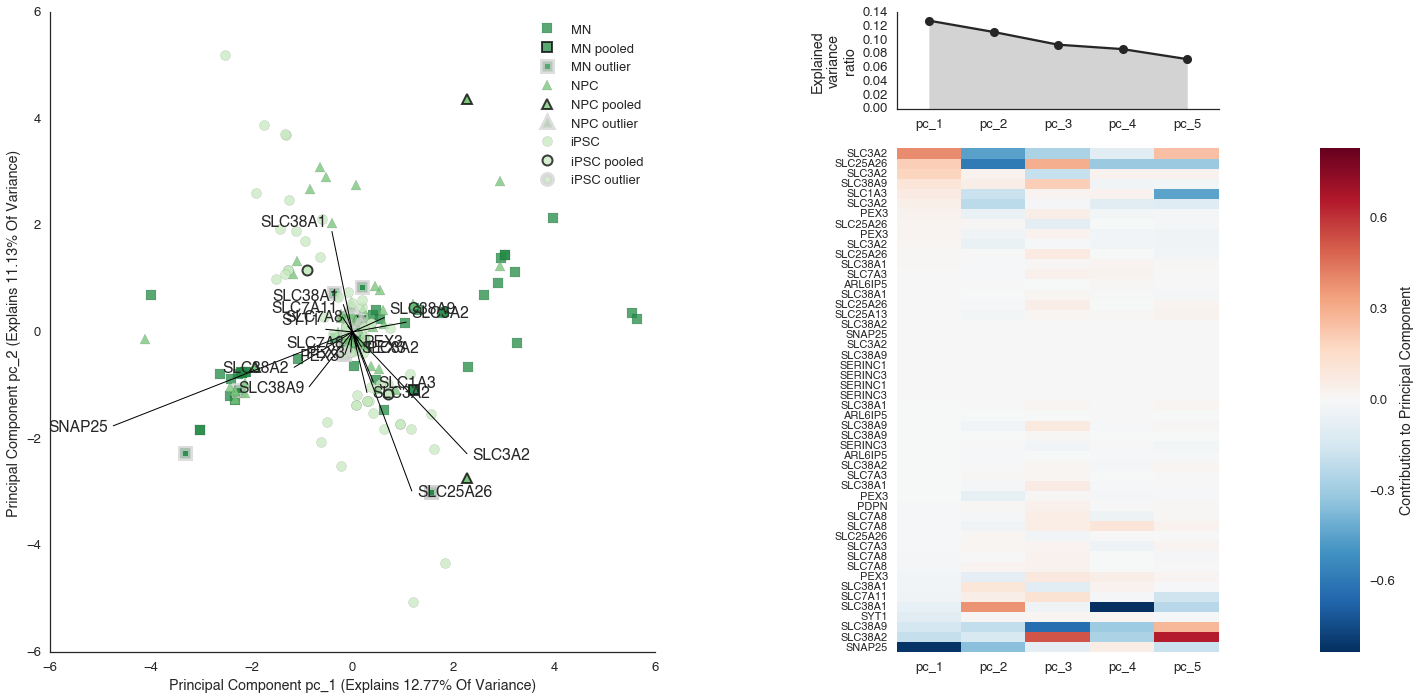

In [31]:
viz = study.plot_pca(feature_subset=singles_splicing.columns, data_type='splicing')

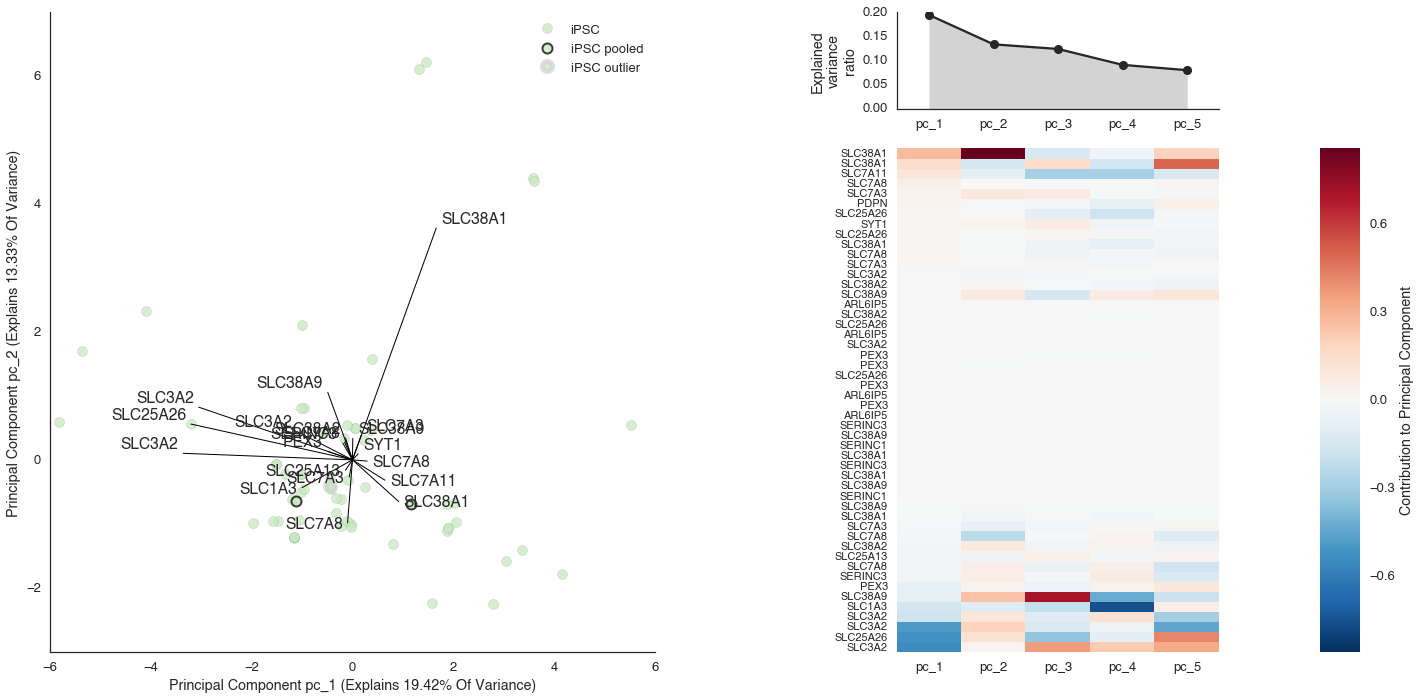

In [45]:
viz = study.plot_pca(feature_subset=singles_splicing.columns, data_type='splicing', sample_subset='iPSC')

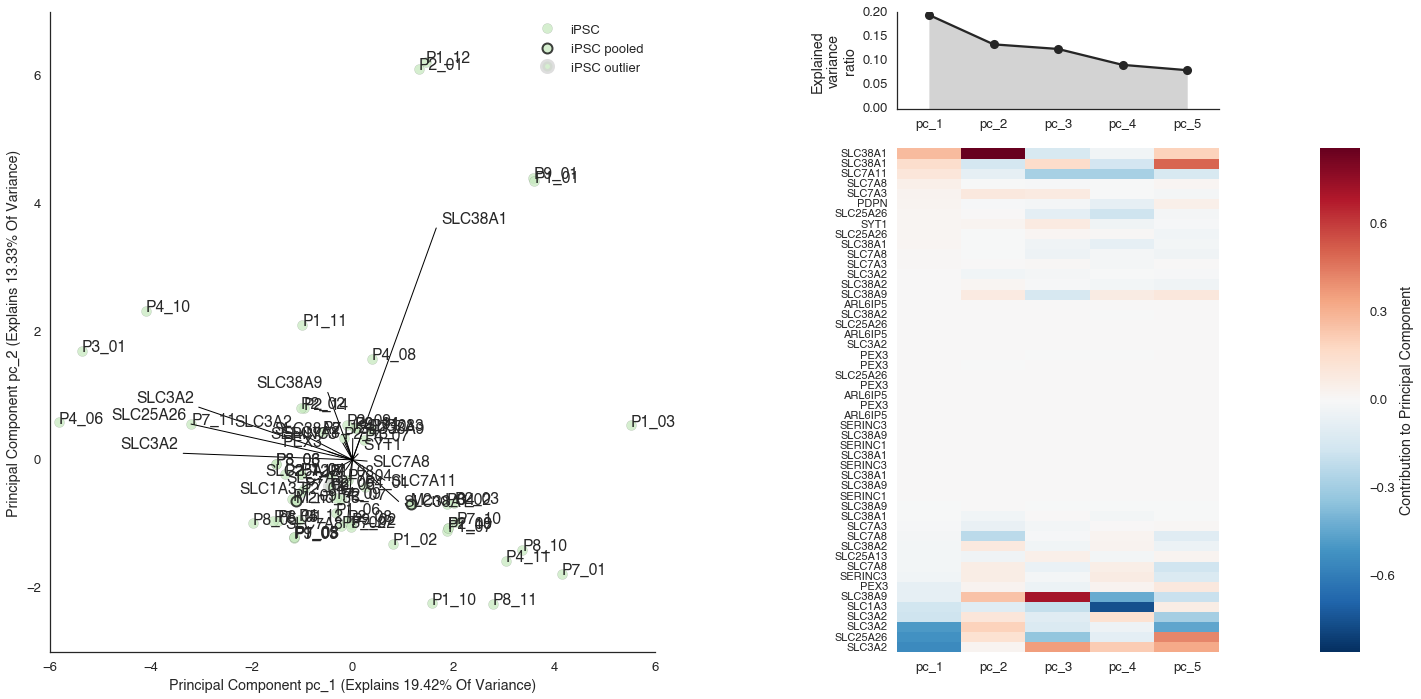

In [46]:
viz = study.plot_pca(feature_subset=singles_splicing.columns, data_type='splicing', 
                     sample_subset='iPSC', show_point_labels=True)

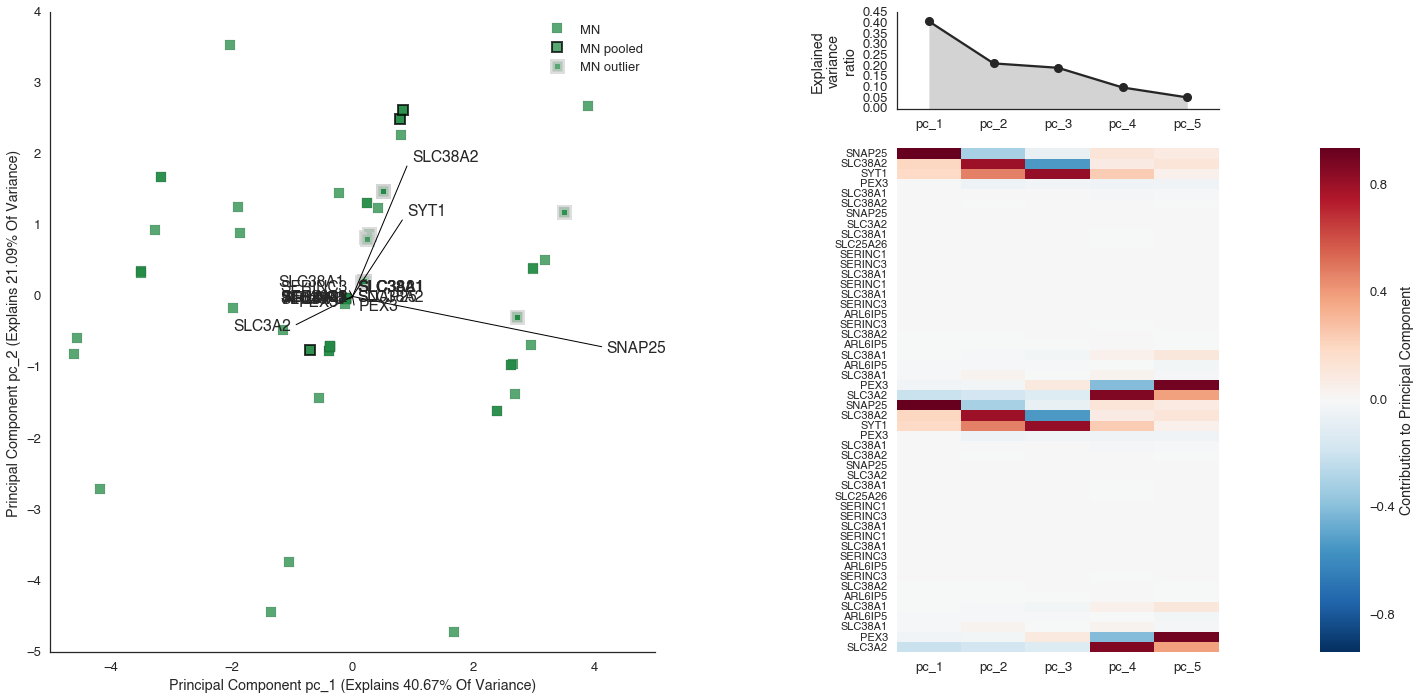

In [34]:
viz = study.plot_pca(feature_subset=singles_splicing.columns, data_type='splicing', sample_subset='MN')

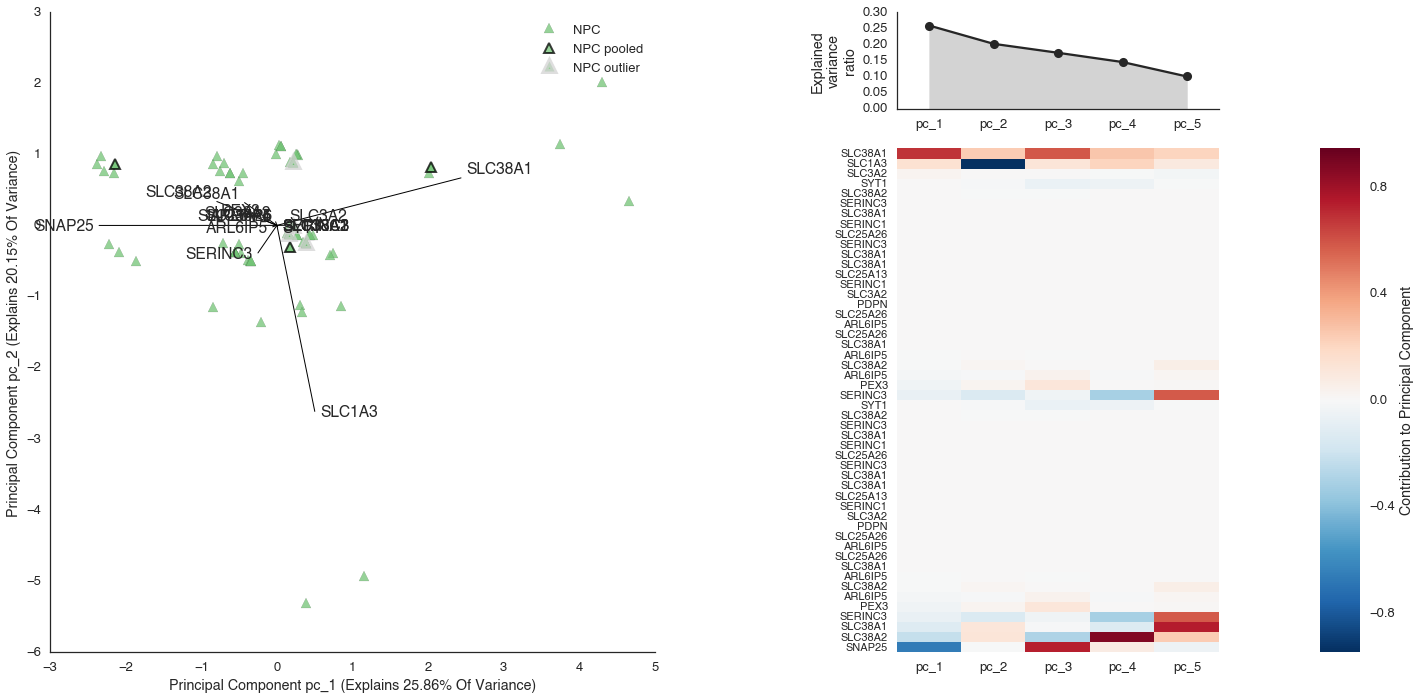

In [35]:
viz = study.plot_pca(feature_subset=singles_splicing.columns, data_type='splicing', sample_subset='NPC')

In [37]:
study.metadata.data.columns

Index([u'single', u'pooled', u'phenotype', u'neuron', u'progenitor',
       u'stressed', u'craig_venter', u'differentiation_batch', u'split',
       u'outlier'],
      dtype='object')

In [43]:
s = study.sample_id_to_phenotype != 'iPSC'
samples = s[s]
samples.head()

CVN_01    True
CVN_02    True
CVN_03    True
CVN_04    True
CVN_05    True
Name: phenotype, dtype: bool

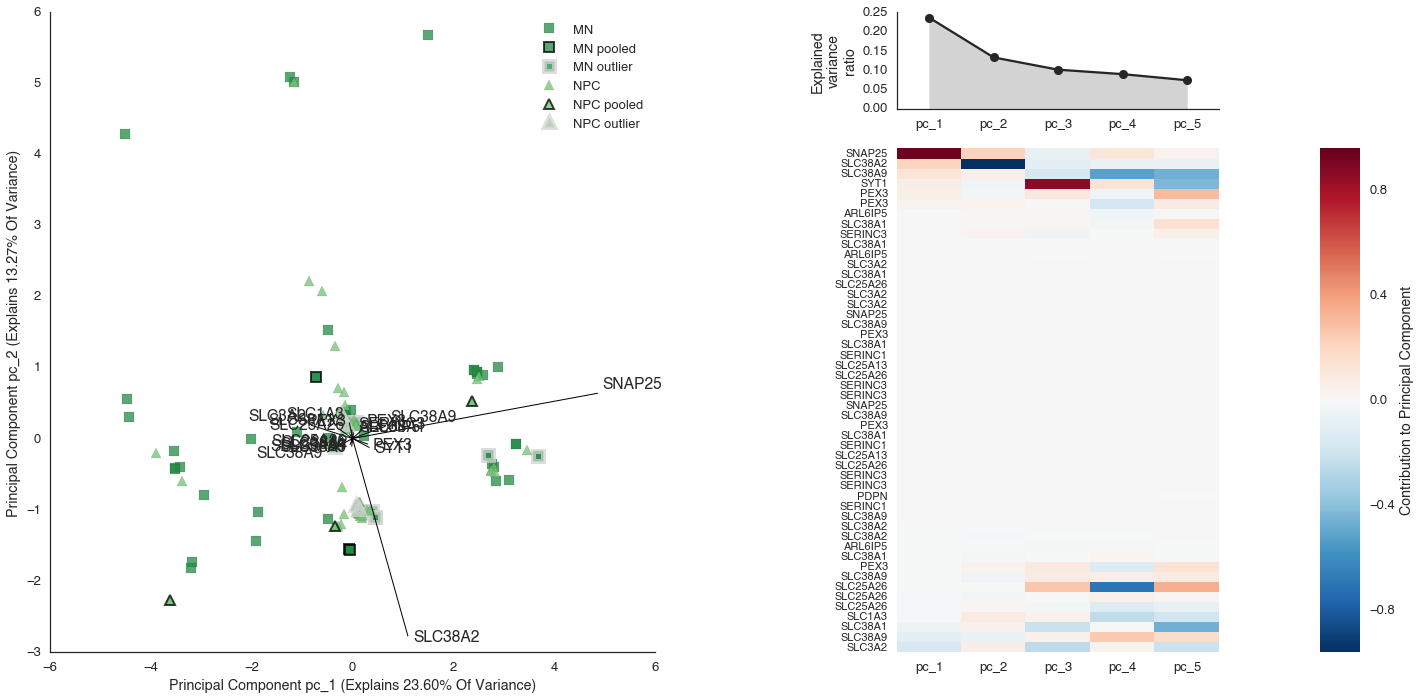

In [44]:
viz = study.plot_pca(feature_subset=singles_splicing.columns, data_type='splicing', 
                     sample_subset=samples.index)

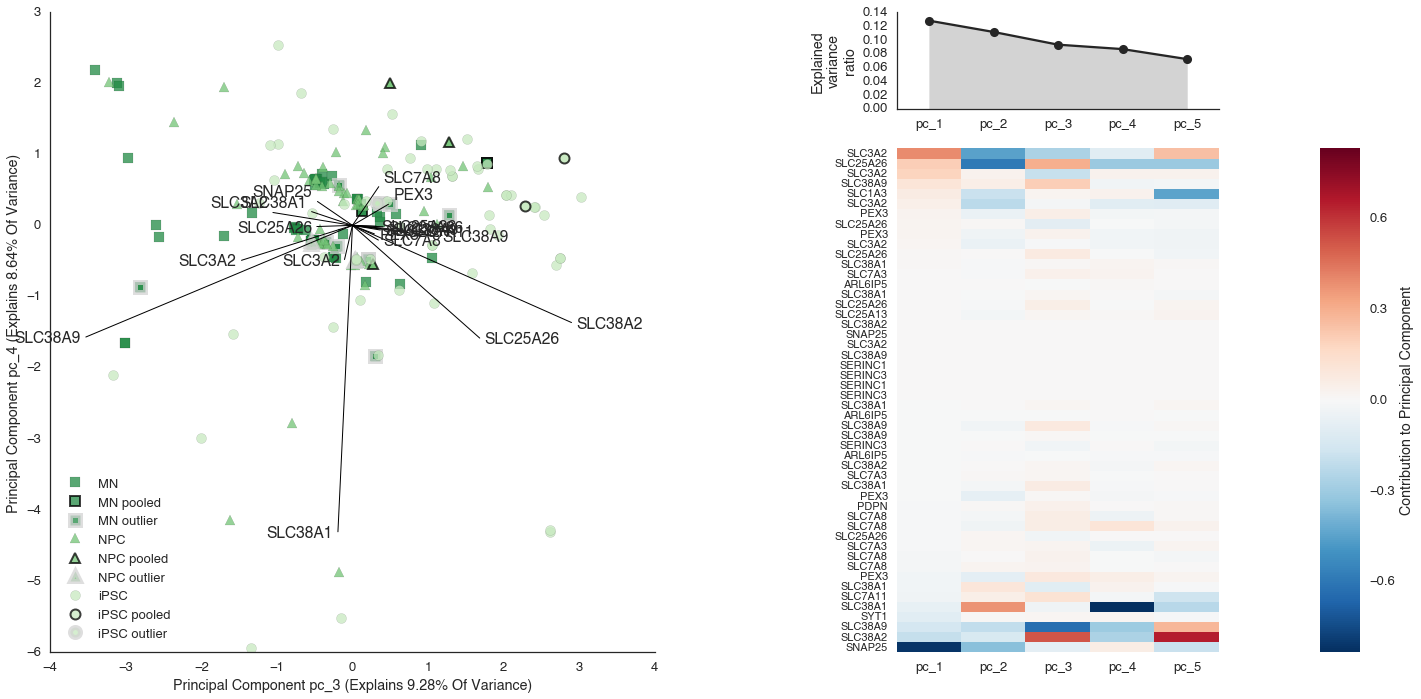

In [32]:
study.plot_pca(feature_subset=singles_splicing.columns, data_type='splicing', x_pc=3, y_pc=4)

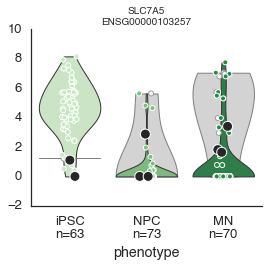

In [33]:
study.plot_gene("SLC7A5")